<a href="https://colab.research.google.com/github/team0243/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

In [6]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [7]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [8]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [9]:
gen_exams('62123456-9')

รหัสนักศึกษา 62123456-9 ทำข้อ 3 และ 0


นายเกียรติศักดิ์ แสนจันทร์ 623021041-7

In [10]:
gen_exams('6230241-7')

รหัสนักศึกษา 6230241-7 ทำข้อ 1 และ 4


## หา Missing Value ของ flights และ airport

In [ ]:
#เพื่อตรวจสอบว่ามีค่าไหนในตารางที่มีความผิดปกติหรือไม่

In [ ]:
flights.isnull()

In [20]:
flights.isnull().any()

วันในเดือน            False
วันในสัปดาห์          False
สายการบิน             False
รหัสสนามบินต้นทาง     False
รหัสสนามบินปลายทาง    False
ความล่าช้าขาออก       False
ความล่าช้าขาเข้า      False
dtype: bool

In [21]:
airports.isnull()

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
360,False,False,False,False
361,False,False,False,False
362,False,False,False,False
363,False,False,False,False


In [22]:
airports.isnull().any()

รหัสสนามบิน    False
เมือง          False
รัฐ            False
ชื่อสนามบิน    False
dtype: bool

**จากการตรวจสอบค่า Missing พบว่า ไม่มีค่าไหนในตารางที่มีช่องว่างเลย**


#รวมตารางเข้าด้วยกัน 

In [23]:
merged_table = flights.merge(airports,how='left',left_on='รหัสสนามบินต้นทาง',right_on='รหัสสนามบิน') #เราจะเชื่อมกันด้วย รหัสสนามบินต้นทางกับรหัสสนามบิน

In [24]:
merged_table

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


#ข้อที่ 4 สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด

กรณี เป็นขาออก(สนามบินปลายทาง)



In [25]:
merged_table['ความล่าช้าขาออก'].max() # 1863 คือค่าที่มากที่สุดในตารางความล่าช้าขาออก

1863

In [66]:
max = merged_table.groupby('สายการบิน').max().sort_values(by=['ความล่าช้าขาออก'],ascending=False)
max.iloc[:1,4:5] # หาว่าสายการบินไหนมีความล่าช้ามากที่สุด 

,ความล่าช้าขาออก
สายการบิน,
AA,1863


In [51]:
merged_table['ความล่าช้าขาออก'].min() # -63 คือค่าที่น้อยที่สุดในตารางความล่าช้าขาออก

-63

In [67]:
min = merged_table.groupby('สายการบิน').min().sort_values(by=['ความล่าช้าขาออก'],ascending=False)
min.iloc[-1:,4:5] #หาว่าสายการบินไหนมีความล่าช้าน้อยที่สุด 

,ความล่าช้าขาออก
สายการบิน,
F9,-63


กรณีเป็นต้นทาง(สนามบินต้นทาง)

In [68]:
merged_table['ความล่าช้าขาเข้า'].max() # 1863 คือค่าที่มากที่สุดในตารางความล่าช้าขาเข้า

1845

In [71]:
max = merged_table.groupby('สายการบิน').max().sort_values(by=['ความล่าช้าขาเข้า'],ascending=False)
max.iloc[:1,5:6] # หาว่าสายการบินไหนมีความล่าช้ามากที่สุด 

,ความล่าช้าขาเข้า
สายการบิน,
HA,1845


In [73]:
merged_table['ความล่าช้าขาเข้า'].min() # -63 คือค่าที่น้อยที่สุดในตารางความล่าช้าขาเข้า

-94

In [74]:
min = merged_table.groupby('สายการบิน').min().sort_values(by=['ความล่าช้าขาออก'],ascending=False)
min.iloc[-1:,5:6] #หาว่าสายการบินไหนมีความล่าช้าน้อยที่สุด 

,ความล่าช้าขาเข้า
สายการบิน,
F9,-59


**ตอบ สนามบินต้นทางที่มีความล่าช้ามากที่สุดคือสายการบิน HA น้อยที่สุดคือสายการบิน F9 \
สนามบินปลายทางที่มีความล่าช้ามากที่สุดคือสายการบิน AA น้อยที่สุดคือสายการบิน F9**

*   รายการในลิสต์
*   รายการในลิสต์



## ข้อที่  1 หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด

In [75]:
merged_table.groupby('รัฐ').count()  ### จำนวนเที่ยวบินในแต่ละรัฐ

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,ชื่อสนามบิน
รัฐ,,,,,,,,,,
AK,7700,7700,7700,7700,7700,7700,7700,7700,7700,7700
AZ,100710,100710,100710,100710,100710,100710,100710,100710,100710,100710
CA,380046,380046,380046,380046,380046,380046,380046,380046,380046,380046
CO,97259,97259,97259,97259,97259,97259,97259,97259,97259,97259
CT,13042,13042,13042,13042,13042,13042,13042,13042,13042,13042
DC,80536,80536,80536,80536,80536,80536,80536,80536,80536,80536
FL,208139,208139,208139,208139,208139,208139,208139,208139,208139,208139
GA,148563,148563,148563,148563,148563,148563,148563,148563,148563,148563
HI,28395,28395,28395,28395,28395,28395,28395,28395,28395,28395


In [76]:
max = merged_table.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False)  ## ใช้รัฐเชื่อมกับสนามบินปลายทางเนื่องจากเป็นขาออก เลือกค่าที่มากที่สุด
max.iloc[:1,4:5]

,รหัสสนามบินปลายทาง
รัฐ,
CA,380046


In [77]:
min = merged_table.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False) ## ## ใช้รัฐเชื่อมกับสนามบินปลายทางเนื่องจากเป็นขาออก เลือกค่าที่น้อยที่สุด
min.iloc[-1:,4:5]

,รหัสสนามบินปลายทาง
รัฐ,
AK,7700


**ตอบ รัฐที่มีจำนวนเครื่องบินขาออกมากที่สุด คือ รัฐ CA และน้อยที่สุด คือรัฐ AK**

#โจทย์ทำเอง ให้ดูกราฟว่าสายการบินไหนมีความล่าช้ามากที่สุด

In [90]:
import matplotlib.pyplot as plotG

In [91]:
from pandas import DataFrame

In [122]:
Data1 = ['สายการบิน','ความล่าช้าขาเข้า']
merged_table[Data1]

,สายการบิน,ความล่าช้าขาเข้า
0,DL,1
1,DL,-8
2,DL,-15
3,DL,24
4,DL,-11
...,...,...
2702213,DL,-3
2702214,DL,-3
2702215,DL,9
2702216,DL,7


In [131]:
G = merged_table[Data1] 
G

,สายการบิน,ความล่าช้าขาเข้า
0,DL,1
1,DL,-8
2,DL,-15
3,DL,24
4,DL,-11
...,...,...
2702213,DL,-3
2702214,DL,-3
2702215,DL,9
2702216,DL,7


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s

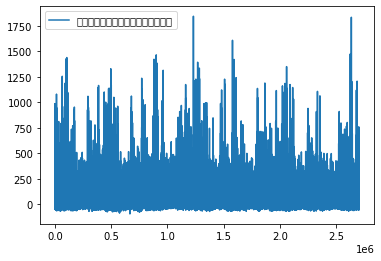

In [134]:
G.plot(kind="line")